In [105]:
#import the necessary libraries 
#for basic data operations 
import numpy as np
import pandas as pd
import nltk
#specifies a set of strings that matches it 
import re 
#for visualizing the data 
import seaborn as sns 
import matplotlib.pyplot as plt 
#to set style for our plot(can use any style not only ggplot) 
from matplotlib import style 
style.use('ggplot')
#to perform tokenization -Breaking down a sequence of characters (such as a string) into smaller pieces (or substrings) is called tokenization
from nltk.tokenize import word_tokenize
# to perform stemming -Stemming is a technique used to reduce an inflected word down to its word stem
from nltk.stem import PorterStemmer
#ti remove stop words and setting stopwords as english -Stopwords are the English words which does not add much meaning to a sentenceand can be ignored
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# to plot the word cloud
#Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency.
!pip install wordcloud
from wordcloud import WordCloud 
#to vectorize the text document 
from sklearn.feature_extraction.text import CountVectorizer 
#to split the data into into training and testing data 
from sklearn.model_selection import train_test_split
#to perform logistic regression 
from sklearn.linear_model import LogisticRegression 
#to evaluate the model 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable


In [4]:
#load the data 
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1")

In [5]:
print(df)

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1048570  4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048571  4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048572  4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048573  4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048574  4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1048570  Ma

In [6]:
#to see the first few rows of the data 
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
#to see the last rows ot the data 
df.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048574,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [9]:
#check if there are null values
df.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [10]:
#Let’s have a look at the insights of the columns to understand the data type of all the columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1048575 non-null  int64 
 1   1467810369                                                                                                           1048575 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1048575 non-null  object
 3   NO_QUERY                                                                                                             1048575 non-null  object
 4   _

In [33]:
#if there are null values 
df.isnull()
#there are no nulls in the data 
df.isnull().sum()
#if there are null values drop the columns with the null values 


0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [36]:
df.columns
column_names=["index","id","date" , "query", "username", "text"]
df.columns = column_names
print(df)

#we drop all the other columns and remain with the column for the sentiments 


         index          id                          date     query  \
0            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4            0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
1048570      4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048571      4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048572      4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048573      4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048574      4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

                username                                               text  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1  

In [37]:
df.columns

Index(['index', 'id', 'date', 'query', 'username', 'text'], dtype='object')

In [38]:
text_df=df.drop(['index', 'id', 'date', 'query', 'username'] ,axis=1)

In [41]:
print(text_df)
text_df.head()

                                                      text
0        is upset that he can't update his Facebook by ...
1        @Kenichan I dived many times for the ball. Man...
2          my whole body feels itchy and like its on fire 
3        @nationwideclass no, it's not behaving at all....
4                            @Kwesidei not the whole crew 
...                                                    ...
1048570           My GrandMa is making Dinenr with my Mum 
1048571  Mid-morning snack time... A bowl of cheese noo...
1048572  @ShaDeLa same here  say it like from the Termi...
1048573             @DestinyHope92 im great thaanks  wbuu?
1048574               cant wait til her date this weekend 

[1048575 rows x 1 columns]


,text
0,is upset that he can't update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...
2,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all...."
4,@Kwesidei not the whole crew


In [46]:
#analyze some of the text data 
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[56],"\n")


is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

my whole body feels itchy and like its on fire  

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

I have a sad feeling that Dallas is not going to show up  I gotta say though, you'd think more shows would use music from the game. mmm 



In [45]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1048575 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [85]:
#data processing - change the data into a useful format 
#create a function
#remove links 
#remove @
#remove stopwords 
def data_processing(text):
    text=text.lower()
    text=re.sub(r"https\S+|www\S+https\S+",' ',text, flags=re.MULTILINE) 
    text=re.sub(r'\@w+|\#',' ',text)
    text=re.sub(r'[^\w\s]' ,' ',text)
    text_tokens = word_tokenize(text)
    filtered_text =[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
    

In [55]:
import nltk
nltk.download('punkt')
text_df.text = text_df['text'].apply(data_processing)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
#remove duplicate data 
text_df = text_df.drop_duplicates('text')


In [87]:
print(text_df)

                                                      text  polarity sentiment
0        upsetcantupdatefacebooktextingmightcryresultsc...       0.0   Neutral
1        kenichandivedmanytimesballmanagedsave50restgob...       0.0   Neutral
2                              wholebodyfeelsitchylikefire       0.0   Neutral
3                      nationwideclassbehavingimmadcantsee       0.0   Neutral
4                                        kwesideiwholecrew       0.0   Neutral
...                                                    ...       ...       ...
1048570                             grandmamakingdinenrmum       0.0   Neutral
1048571            midmorningsnacktimebowlcheesenoodlesyum       0.0   Neutral
1048572     shadelasayliketerminiatormoviescomeslike3words       0.0   Neutral
1048573                    destinyhope92imgreatthaankswbuu       0.0   Neutral
1048574                             cantwaittildateweekend       0.0   Neutral

[1016920 rows x 3 columns]


In [59]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data 

In [60]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [61]:
text_df.head()

,text
0,upsetcantupdatefacebooktextingmightcryresultsc...
1,kenichandivedmanytimesballmanagedsave50restgob...
2,wholebodyfeelsitchylikefire
3,nationwideclassbehavingimmadcantsee
4,kwesideiwholecrew


In [62]:
#modified data 
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[56],"\n")


upsetcantupdatefacebooktextingmightcryresultschooltodayalsoblah 

kenichandivedmanytimesballmanagedsave50restgobounds 

wholebodyfeelsitchylikefire 

nationwideclassbehavingimmadcantsee 

ugh92degreestomorrow 



In [63]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016920 entries, 0 to 1048574
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1016920 non-null  object
dtypes: object(1)
memory usage: 15.5+ MB


In [66]:
#calculate the polarity of the sentences 
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [73]:
# Import TextBlob
!pip install textblob
from textblob import TextBlob

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 636.8/636.8 kB 1.7 MB/s eta 0:00:00


In [74]:
#calculate the polarity of the sentences 
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_df['polarity'] = text_df['text'].apply(polarity)

In [75]:
text_df.head(10)

,text,polarity
0,upsetcantupdatefacebooktextingmightcryresultsc...,0.0
1,kenichandivedmanytimesballmanagedsave50restgob...,0.0
2,wholebodyfeelsitchylikefire,0.0
3,nationwideclassbehavingimmadcantsee,0.0
4,kwesideiwholecrew,0.0
5,needhug,0.0
6,loltrishheylongtimeseeyesrainsbitbitlolimfinet...,0.0
7,tatiana_knopedidnt,0.0
8,twitteraquemuera,0.0
9,springbreakplaincitysnowing,0.0


In [76]:
text_df.tail(10)

,text,polarity
1048565,lookingforwardminibreakislewightfriendsweekend...,0.0
1048566,gringostartonightsoutherngaragehttpwwwfacebook...,0.0
1048567,davidbassheeheeilltakerainwindchilldaylovecost...,0.0
1048568,todaysmessagechurchservicedeliveredviaskypesfr...,0.0
1048569,backhomethoughtiddoneweekcallaltersomethingels...,0.0
1048570,grandmamakingdinenrmum,0.0
1048571,midmorningsnacktimebowlcheesenoodlesyum,0.0
1048572,shadelasayliketerminiatormoviescomeslike3words,0.0
1048573,destinyhope92imgreatthaankswbuu,0.0
1048574,cantwaittildateweekend,0.0


In [77]:
 def sentiment(label):
        if label <0:
            return "Negative"
        elif label ==0:
            return "Neutral"
        else:
            return "Positive"

In [78]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [79]:
print(text_df)

                                                      text  polarity sentiment
0        upsetcantupdatefacebooktextingmightcryresultsc...       0.0   Neutral
1        kenichandivedmanytimesballmanagedsave50restgob...       0.0   Neutral
2                              wholebodyfeelsitchylikefire       0.0   Neutral
3                      nationwideclassbehavingimmadcantsee       0.0   Neutral
4                                        kwesideiwholecrew       0.0   Neutral
...                                                    ...       ...       ...
1048570                             grandmamakingdinenrmum       0.0   Neutral
1048571            midmorningsnacktimebowlcheesenoodlesyum       0.0   Neutral
1048572     shadelasayliketerminiatormoviescomeslike3words       0.0   Neutral
1048573                    destinyhope92imgreatthaankswbuu       0.0   Neutral
1048574                             cantwaittildateweekend       0.0   Neutral

[1016920 rows x 3 columns]


<AxesSubplot:xlabel='sentiment', ylabel='count'>

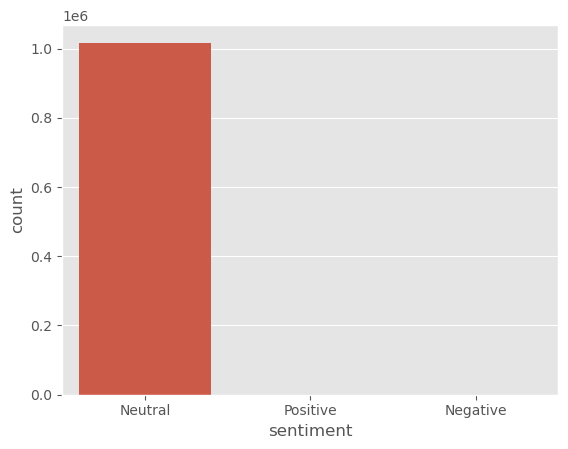

In [83]:
#visualize the sentiment distibution 
sns.countplot(x='sentiment' , data = text_df)
#all sentiments are neutral 

In [84]:
pos_tweets = text_df[text_df.sentiment=='Neutral']
print(pos_tweets)

                                                      text  polarity sentiment
0        upsetcantupdatefacebooktextingmightcryresultsc...       0.0   Neutral
1        kenichandivedmanytimesballmanagedsave50restgob...       0.0   Neutral
2                              wholebodyfeelsitchylikefire       0.0   Neutral
3                      nationwideclassbehavingimmadcantsee       0.0   Neutral
4                                        kwesideiwholecrew       0.0   Neutral
...                                                    ...       ...       ...
1048570                             grandmamakingdinenrmum       0.0   Neutral
1048571            midmorningsnacktimebowlcheesenoodlesyum       0.0   Neutral
1048572     shadelasayliketerminiatormoviescomeslike3words       0.0   Neutral
1048573                    destinyhope92imgreatthaankswbuu       0.0   Neutral
1048574                             cantwaittildateweekend       0.0   Neutral

[1016727 rows x 3 columns]


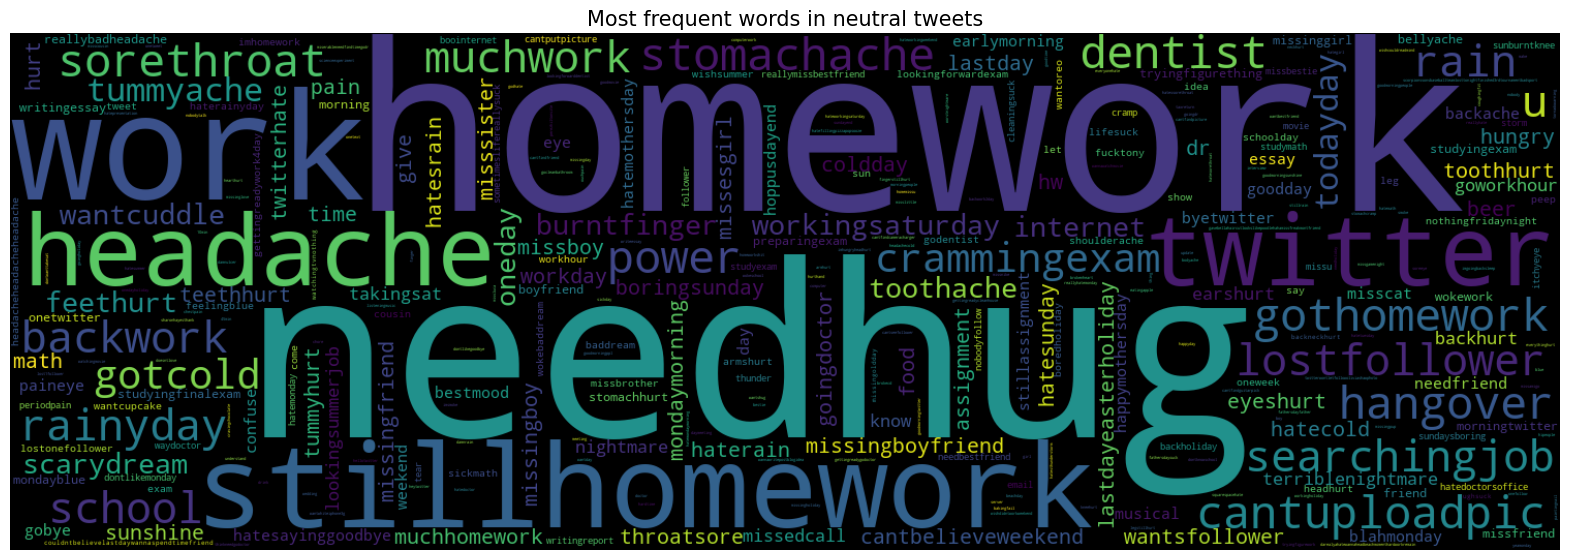

In [90]:
#use wordcloud to visualize the neutral sentiments 
text=' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,20),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1500,height=500).generate(text)
plt.imshow(wordcloud ,interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize = 15)
plt.show()

In [92]:
#creating a bigram model 
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [93]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features:1016911

First 20 features:
 ['0001badtimeseskimo', '0001tspeakingbrightwhatovercastday', '0003imwreckedimhungryampgetearlyperfectfrinightlolnight', '0009stilldonepackingtiredguysfill', '000marthathank', '0012sighcharfevergettingworriedtransfusionsstoppedyetplasmapackedcells', '0036imstillpleasehelpsleepx', '0040cantsleep5hourslovedweathertodaythough', '0047stockholmimstillawakegonneget5work', '005587mayneedpotwowzaabbybillycrankytodayfunshoppingnevermuchfabric', '007heather007thoughtwalesalwayssunny', '007peterlovewindows7hatecantgetconnectinternetwire', '007petersorrytodaytiredhatework', '007peterunfortunatelynevershowsneverending', '007peteryessircertainlylooksway', '008ârestaurantmoonatmosphereâ', '008ï½restaurantmoonatmosphereï½', '00__00accessworkthinksireland', '00bleryesneedshowlotslykketil', '00drabbitappalledalwaysgoodsigh']


In [94]:
#build the model 
X = text_df['text']
Y = text_df['sentiment']
X= vect.transform(X)


In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [97]:
print("Size of x_train:",(x_train.shape))
print("Size of y_train:",(y_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (813536, 1016911)
Size of y_train: (813536,)
Size of x_test: (203384, 1016911)
Size of y_test: (203384,)


In [99]:
#train the data with logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test of accuracy: {:.2f}%".format(logreg_acc*100))



Test of accuracy: 99.98%


In [103]:
#print confusion matrix 
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[     0     23      0]
 [     0 203339      0]
 [     0     22      0]]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       1.00      1.00      1.00    203339
    Positive       0.00      0.00      0.00        22

    accuracy                           1.00    203384
   macro avg       0.33      0.33      0.33    203384
weighted avg       1.00      1.00      1.00    203384



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

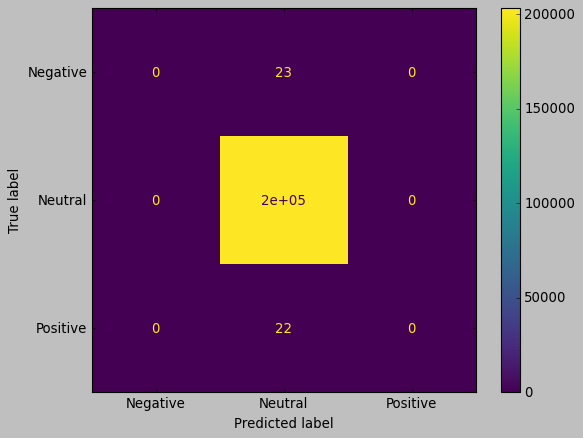

In [108]:
style.use('classic')
cm= confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()